In [11]:
import pandas as pd
import numpy as np
import cvxpy as cp
import random
##for print image
import matplotlib.pyplot as plt


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


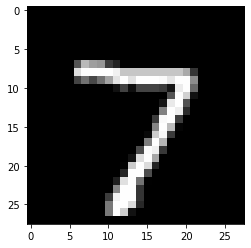

In [12]:
#Read the csv file 
Train_data = pd.read_csv("mnist_train.csv",header=0)
Test_data = pd.read_csv("mnist_test.csv",header=0)
Train_label = Train_data.iloc[:,0].values
Test_label = Test_data.iloc[:,0].values
Train_data = Train_data.iloc[:,1:].values
Test_data = Test_data.iloc[:,1:].values

print(Test_data)
#test to print a image 
img = Test_data[0].reshape(28,28)
plt.imshow(img, 'gray')
plt.show()

In [13]:
#Use the classifer
IMG_COL = 28
IMG_ROW = 28 

#Extract 2 digit from data set and lable set 
#Return numpy 2d arr for data and 1d arr for label  
def extract_two_digit(digit1,digit2,data,label):
    m_data = []
    m_label = []
    #Extrac the digit1 and digit 2 
    for i in range(0, len(label)):
        if label[i] == digit1:
            #print(Train_data[i,:])
            m_label.append(digit1)
            m_data.append(data[i])
        elif label[i]==digit2:
            m_label.append(digit2)
            m_data.append(data[i])

    return np.array(m_data), np.array(m_label)

#print the bit map (for testing)
#img: 28*28 length vector 
def printImg(img):
    img = img.reshape(28,28)
    plt.imshow(img, 'gray')
    plt.show()


In [14]:
class MyClassifier:
    def __init__(self,K,M):
        self.K = K  #Number of classes
        self.M = M  #Number of features
        self.W = []
        self.w = []
        self.m_classifer_label = []
        
    def train(self, p, train_data, train_label):
        
        # THIS IS WHERE YOU SHOULD WRITE YOUR TRAINING FUNCTION
        #
        # The inputs to this function are:
        #
        # self: a reference to the classifier object.
        # train_data: a matrix of dimesions N_train x M, where N_train
        # is the number of inputs used for training. Each row is an
        # input vector.
        # trainLabel: a vector of length N_train. Each element is the
        # label for the corresponding input column vector in trainData.
        #
        # Make sure that your code sets the classifier parameters after
        # training. For example, your code should include a line that
        # looks like "self.W = a" and "self.w = b" for some variables "a"
        # and "b".
        

        #################################Start####################################
        
        #Check the train data and set the necessary parameter 
        #assert True==(train_data[0].all()!=[] and train_label!=None),"The train data or train label is None"
        self.M = len(train_data[0]) 

        #drop the data 
        

        #extract the data for each class 
        classes_data_index = [] 
        classes_label = [] 
        for i, label in enumerate(train_label):
            if(label in classes_label):
                index = classes_label.index(label)
                classes_data_index[index].append(i)
            else:
                classes_label.append(label) 
                classes_data_index.append([i])
        
        


        
        # The code does not check for tain label, so make sure the input data only 
        # contain 2 classes, otherwise the output biased classifier, which is bad. 
        #!!!The first set in the train set represent +1 in the classifier. 
        """
        a = cp.Variable(self.M)
        b = cp.Variable(1)
        #the size of z is the count of the set of train_data 
        z = cp.Variable(len(train_label))

        #constrains
        constraints = []  
        label_1 = train_label[0]
        #Erease the data based on p 
        #drop_count = 0
        for i in range(0, len(train_data)):
            for j in range(0, len(train_data[i])):
                if(random.uniform(0,1)<p):
                    train_data[i][j] = 0 
                    #drop_count+=1
        #print("Total Drop: ", drop_count)
        #printImg(train_data[25])
        for i in range(0, len(train_label)):
            #check the length of the train data 
            assert True==(len(train_data[i])==self.M)
            s=1 
            if(train_label[i]!=label_1):
                s = -1 
            constraints += [
                z[i]>=0,
                (1-s*(a.T@train_data[i]+b))<=z[i]
            ]
        prob = cp.Problem(cp.Minimize(sum(z)),constraints)
        prob.solve() 
        self.W = a.value  
        self.w = b.value 
        """
        print(classes_data_index); 
        print(classes_label)

    
            
        
    def f(self,input):
        # THIS IS WHERE YOU SHOULD WRITE YOUR CLASSIFICATION FUNCTION
        #
        # The inputs of this function are:
        #
        # input: the input to the function f(*), equal to g(y) = W^T y + w
        #
        # The outputs of this function are:
        #
        # s: this should be a scalar equal to the class estimated from
        # the corresponding input data point, equal to f(W^T y + w)
        # You should also check if the classifier is trained i.e. self.W and
        # self.w are nonempty


        #################################Start####################################
        #Output: output 1 if the input is classified to be the first set in the 
        # train data set!!!!
        assert True==( self.W!=[] and self.w!=None ), "self.W or self.w equal None!!!"
        assert True==(len(self.W) == len(input)), "The input length doest not match the classifier!!!" 
        if (self.W.T@input + self.w >= 0):
            return 1
        else:
            return -1 
      
        
    def classify(self,test_data):
        # THIS FUNCTION OUTPUTS ESTIMATED CLASSES FOR A DATA MATRIX
        # 
        # The inputs of this function are:
        # self: a reference to the classifier object.
        # test_data: a matrix of dimesions N_test x M, where N_test
        # is the number of inputs used for training. Each row is an
        # input vector.
        #
        #
        # The outputs of this function are:
        #
        # test_results: this should be a vector of length N_test,
        # containing the estimations of the classes of all the N_test
        # inputs.
        
        print() #you can erase this line
    
    
    def TestCorrupted(self,p,test_data):
        # THIS FUNCTION OUTPUTS ESTIMATED CLASSES FOR A DATA MATRIX
        #
        #
        # The inputs of this function are:
        #
        # self: a reference to the classifier object.
        # test_data: a matrix of dimesions N_test x M, where N_test
        # is the number of inputs used for training. Each row is an
        # input vector.
        #
        # p:erasure probability
        #
        #
        # The outputs of this function are:
        #
        # test_results: this should be a vector of length N_test,
        # containing the estimations of the classes of all the N_test
        # inputs.
        
        print() #you can erase this line

    def __extract_two_digit(digit1,digit2,data,label):
        #OUTPUT:data only contan digit1, digit2, and corrosponding label 
        m_data = []
        m_label = []
        #Extrac the digit1 and digit 2 
        for i in range(0, len(label)):
            if label[i] == digit1:
                #print(Train_data[i,:])
                m_label.append(digit1)
                m_data.append(data[i])
            elif label[i]==digit2:
                m_label.append(digit2)
                m_data.append(data[i])

        return np.array(m_data), np.array(m_label)

    def __train_binary_classifier(self, p, train_data, train_label,two_label,train_data_indexes):
        a = cp.Variable(self.M)
        b = cp.Variable(1)
        #the size of z is the count of the set of train_data 
        z = cp.Variable(len(train_label))

        #constrains
        constraints = []  
        label_1 = train_label[0]
        #Erease the data based on p 
        #drop_count = 0
        for i in range(0, len(train_data)):
            for j in range(0, len(train_data[i])):
                if(random.uniform(0,1)<p):
                    train_data[i][j] = 0 
                    #drop_count+=1
        #print("Total Drop: ", drop_count)
        #printImg(train_data[25])
        for i in range(0, len(train_label)):
            #check the length of the train data 
            assert True==(len(train_data[i])==self.M)
            s=1 
            if(train_label[i]!=label_1):
                s = -1 
            constraints += [
                z[i]>=0,
                (1-s*(a.T@train_data[i]+b))<=z[i]
            ]
        prob = cp.Problem(cp.Minimize(sum(z)),constraints)
        prob.solve() 

        




In [15]:
####################Example of Training with class 1 and 7#########################
#classifier = MyClassifier(2, 28*28)
#Train_data_17,Train_label_17 = extract_two_digit(1,7,Train_data,Train_label)
#Test_data_17,Test_label_17 = extract_two_digit(1,7,Test_data,Test_label) 
#classifier.train(0.6,Train_data_17, Train_label_17)
#classifier.train(0.6,Test_data_17, Test_label_17)


classifier = MyClassifier(2, 28*28)
Train_data_17,Train_label_17 = extract_two_digit(1,7,Train_data,Train_label)
Test_data_17,Test_label_17 = extract_two_digit(1,7,Test_data,Test_label) 
classifier.train(0.6,Test_data_17, Test_label_17)

[[0, 4, 5, 8, 9, 13, 16, 17, 18, 20, 21, 22, 23, 24, 28, 30, 31, 32, 33, 34, 37, 39, 43, 44, 55, 56, 59, 60, 62, 64, 65, 66, 67, 73, 75, 77, 79, 83, 90, 91, 94, 99, 100, 101, 102, 107, 109, 113, 115, 118, 119, 123, 124, 125, 126, 127, 129, 130, 132, 134, 135, 138, 139, 141, 143, 144, 147, 148, 150, 151, 155, 156, 157, 160, 161, 164, 168, 171, 178, 180, 182, 185, 189, 190, 191, 194, 195, 196, 197, 199, 202, 203, 204, 208, 209, 210, 213, 215, 222, 226, 229, 231, 237, 240, 241, 244, 245, 247, 248, 249, 250, 251, 252, 253, 255, 259, 260, 261, 262, 263, 264, 265, 268, 271, 273, 277, 278, 282, 283, 286, 287, 289, 295, 296, 297, 300, 301, 304, 306, 308, 309, 310, 312, 313, 316, 322, 325, 326, 327, 328, 329, 330, 331, 333, 334, 337, 338, 339, 342, 343, 344, 345, 346, 348, 349, 351, 352, 359, 361, 365, 366, 368, 370, 372, 373, 374, 377, 379, 380, 382, 385, 386, 388, 390, 391, 394, 395, 396, 397, 398, 399, 408, 412, 414, 417, 420, 422, 424, 425, 427, 429, 431, 432, 433, 434, 442, 445, 447, 449, 

In [16]:
#############################Test the classifer###############################
"""
labelPresent_1 = Train_label_17[0] #The first data in the train data set will 1 in this binary classifer, the other one is -1 
correct_count=0
wrong_count = 0 
for i in range(0,len(Test_label_17)):
    label = 1
    if(Test_label_17[i] != labelPresent_1):
        label = -1 
    if(classifier.f(Test_data_17[i]) != label):
        wrong_count+=1
    else:
        correct_count+=1 
correct_percentage = 100*correct_count/(correct_count+wrong_count)
print ("correct: ", correct_count)
print("wrong: ", wrong_count)
print("Precision: " ,round(correct_percentage,4),"%")
"""

'\nlabelPresent_1 = Train_label_17[0] #The first data in the train data set will 1 in this binary classifer, the other one is -1 \ncorrect_count=0\nwrong_count = 0 \nfor i in range(0,len(Test_label_17)):\n    label = 1\n    if(Test_label_17[i] != labelPresent_1):\n        label = -1 \n    if(classifier.f(Test_data_17[i]) != label):\n        wrong_count+=1\n    else:\n        correct_count+=1 \ncorrect_percentage = 100*correct_count/(correct_count+wrong_count)\nprint ("correct: ", correct_count)\nprint("wrong: ", wrong_count)\nprint("Precision: " ,round(correct_percentage,4),"%")\n'